# Lab 060 - Features and model selection - Exploration of TREFLE

In [1]:
import sys
!{sys.executable} -m pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/e9/69/f5e05f578585ed9935247be3788b374f90701296a70c8871bcd6d21edb00/matplotlib-3.0.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/d9/3ec19e966301a6e25769976999bd7bbe552016f0d32b577dc9d63d2e0c49/pyparsing-2.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/e2/4db8df8f6cddc98e7d7c537245ef2f4e41a1ed17bf0c3177ab3cc6beac7f/numpy-1.16.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using

In [2]:
!{sys.executable} -m pip install pandas

  Using cached https://files.pythonhosted.org/packages/19/74/e50234bc82c553fecdbd566d8650801e3fe2d6d8c8d940638e3d8a7c5522/pandas-0.24.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c1/e2/4db8df8f6cddc98e7d7c537245ef2f4e41a1ed17bf0c3177ab3cc6beac7f/numpy-1.16.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3d/73/fe30c2daaaa0713420d0382b16fbb761409f532c56bdcc514bf7b6262bb6/pytz-2019.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl


In [3]:
!{sys.executable} -m pip install sklearn

  Using cached https://files.pythonhosted.org/packages/5e/82/c0de5839d613b82bddd088599ac0bbfbbbcbd8ca470680658352d2c435bd/scikit_learn-0.20.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7f/5f/c48860704092933bf1c4c1574a8de1ffd16bf4fde8bab190d747598844b2/scipy-1.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c1/e2/4db8df8f6cddc98e7d7c537245ef2f4e41a1ed17bf0c3177ab3cc6beac7f/numpy-1.16.3-cp36-cp36m-manylinux1_x86_64.whl


In [4]:
!{sys.executable} -m pip install trefle

  Using cached https://files.pythonhosted.org/packages/d1/4a/3043c0f0c99f3dc6fda6c2e52d0bc522b26c06cd0191f91695b3cd5c678f/trefle-0.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/19/74/e50234bc82c553fecdbd566d8650801e3fe2d6d8c8d940638e3d8a7c5522/pandas-0.24.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7f/5f/c48860704092933bf1c4c1574a8de1ffd16bf4fde8bab190d747598844b2/scipy-1.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c1/e2/4db8df8f6cddc98e7d7c537245ef2f4e41a1ed17bf0c3177ab3cc6beac7f/numpy-1.16.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/82/c0de5839d613b82bddd088599ac0bbfbbbcbd8ca470680658352d2c435bd/scikit_learn-0.20.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-non

Lab developed by: Diogo  Leite - 03.2019<br>
Trefle algorithm: Gary Marigliano. (Based on the PhD thesis of Carlos Peña https://infoscience.epfl.ch/record/33110)

# Instructions
<br>
In this notebook, we use the Breast Cancer Wisconsin Diagnostic (BCWD) dataSet. You can find more details here: 

[UCI](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic%29)

### TODO in this notebook
You should provide your answers to the questions of this notebook in a report (Note that a short and concise report with the essential information is **much** better than a long one that tells nothing...). Just indicate clearly the number of the question and give the respective answer. If you need plots to confirm your observations, include them also. At the end, send the notebook in annex to your report.
<br>
Sometimes you will need to select (decide on) some values as a way to perform filters that reduce the number of models (and save the bests).
<br>
<b>Some experiences take time (up to several hours), consider that in order to don't do your lab at the last minute (all the experiments are potentially different as TREFLE isn't a deterministic algorithm).
    

### How to submit your lab

Export all the notebooks in HTML format (in the case your lab could not be reproduced for any reason) + zip your whole lab folder without the dataset(s). If your lab requires additional dependencies, please add a INSTRUCTIONS.md file in your folder with the instructions to install them. Don't forget to add the additional dependencies at the end of your requirements.txt file (or do a pip freeze > requirements_personal.txt command).
<br>
You must write a short report (as mentioned above) with three sections (one for each dataset) and respond to all the questions in each section. Include the report (<b>PDF and only PDF</b>) on the zip. The organization of the report must follow the structure below:
<ul>
    <li>Dataset BCWD</li>
    <ul>
        <li>Question 1 </li>
        <li>Question ... </li>
    </ul>
</ul>

Note that the values (parameters of the algorithm) provided in this notebook are given only as example and may not be adequate for your lab. You will need to make decisions on these values, and sometimes justify them.


# 0. Preparatory stage

## Set up the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import json
import numpy as np
import random
import math
import time



from pprint import pprint
from collections import Counter
from matplotlib.ticker import MaxNLocator
from itertools import tee



from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from trefle.fitness_functions.output_thresholder import round_to_cls
from trefle.trefle_classifier import TrefleClassifier

from trefle_engine import TrefleFIS



import libraries.measures_calculation
import libraries.trefle_project
import libraries.interpretability_methods
import libraries.interpretability_plots
import libraries.results_plot
from libraries.model_var import ModelVar
from libraries.model_train_cv import *

## Split the dataset
<br>
The first step of the ML process is to split our dataset into training and test parts (subsets). <br> 
<ul>
    <li>You must indicate the path of your original dataset</li>
    <li>You must indicate the path where you want to save the training part</li>
    <li>You must indicate the path where you want to save the test part</li>
</ul>
<br>When a plot is "open" you need to "shut it down" in order to plot the others (button on the upper corner right)

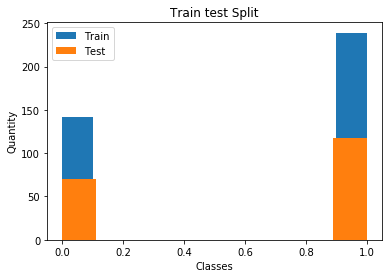

In [2]:
#Read Dataset
#Indicate the path of the original DS HERE:
#--------------------
csv_path_file_name = './datasets/WDBC/data_WDBC.csv'
#--------------------

data_load = pd.read_csv(csv_path_file_name, sep = ',')

#Before continue, please remove the variables that you don't want to use along this lab.

#Use to drop columns
#data_load.drop(['p1', 'p13'], axis=1)

X = data_load.iloc[:, 1:-1]
y = data_load.iloc[:,-1]

#Split it into train test DS
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, random_state=42, test_size=0.33)

plt.hist(y_train, bins='auto', label='Train')

plt.hist(y_test, bins='auto', label='Test')
plt.title("Train test Split")
plt.xlabel('Classes')
plt.ylabel('Quantity')
plt.legend()
plt.show()


#Save separetly in training and test
#It is important to save the training and test sets (we will use the test in the second part)
y_train_modify = np.reshape(y_train, (-1, 1))
train_dataset = np.append(X_train, y_train_modify, axis=1)

y_test_modify = np.reshape(y_test, (-1, 1))
test_dataset = np.append(X_test, y_test_modify, axis=1)

#This indicates to numpy how to format the output (you can create a function for a larger number of variables...)
#format_values = '%1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %1.3f %i'


#Indicate the path where you want to save the training and test part DS HERE:
#--------------------
path_train_csv = './datasets/WDBC/data_WDBC_train_v2.csv'
path_test_csv = './datasets/WDBC/data_WDBC_test_v2.csv'
#--------------------
np.savetxt(path_train_csv, train_dataset, delimiter=",")
np.savetxt(path_test_csv, test_dataset, delimiter=",")


<b style="background-color:red;color:white">Question 1</b>:  Comment the plot above (include it into your report)

## Trefle Classifier
<br> In the code below you have a description of the (fuzzy logic-based) classifier that we use along this labo, the theory is provided in the slides of the cours. <br>
Don't forget to change, if necessary, the number of generations (iterations) of your algorithm. 

In [3]:
#Initialize our classsifier TREFLE
clf = TrefleClassifier(
    n_rules=4,
    n_classes_per_cons=[2],  # there is only 1 consequent with 2 classes
    n_labels_per_mf=3,  # use 3 labels LOW, MEDIUM, HIGH
    default_cons=[0],  # default rule yield the class 0
    n_max_vars_per_rule=3,  # WBCD dataset has 30 variables, here we force
    # to use a maximum of 3 variables per rule
    # to have a better interpretability
    # In total we can have up to 3*4=12 different variables
    # for a fuzzy system
    
    #Change here the number of generations (if necessary)
    n_generations=300,
    verbose=False,
)

## Training and predicting with Trefle
<br> Below you have a simple example of how to:<br>
<ul>
    <li>train a model and make a prediction with it</li>
    <li>save the model in a file</li>
</ul>

In [4]:
start_time = time.time()
#Make a train
y_sklearn = np.reshape(y_train, (-1, 1))

clf.fit(X_train, y_sklearn)
# Make predictions
y_pred = clf.predict_classes(X_test)

clf.print_best_fuzzy_system()

# Evaluate accuracy
score = accuracy_score(y_test, y_pred)
print("Score on test set: {:.3f}".format(score))

tff = clf.get_best_fuzzy_system_as_tff()

elapsed_time = time.time() - start_time
print("it took {} seconds".format(elapsed_time))

# Export: save the fuzzy model to disk
with open("my_saved_model_trefle.tff", mode="w") as f:
    f.write(tff)


Score on test set: 0.947
it took 105.0179750919342 seconds


# 1. Launch the Trefle experiments (or modeling runs)
In this labo we perform k-fold cross-validation, so you must indicate how many folds do you want (by default 10). If you don't understand this concept, investigate it and/or discuss it with your class mates, the TA or the professor.

We could perform an exhaustive search for many parameters of the algorithm but, for this labo we will only search for parameters related with the size (complexity) of the model: i.e., number of rules and variables per rule.

**Note 1:** You must indicate the path where you want to save all the models obtained. <br>

**Note 2:** You must choose and justify the range of values you will explore for:
<ul>
    <li>the different weights (importance) for the three criteria: sensitivity, specificity, and RMSE</li>
    <li>the number of rules</li>
    <li>the maximum number of variables per rule </li>
</ul>

The code must be adapted according to your choices.

## 1.1 Search for fitness function weights

The first part of the lab focuses on balancing the three criteria that we want to use as performance metrics. In our case, we will concentrate on maximising the sensitivity and the specificity (related with diagnostic performance) and minimizing the RMSE, related with numeric precision. To do so, we will search for a combination (weights) of these 3 criteria  that facilitates the search to the algorithm. You can look at the slides for more details.

### First: equilibrating weights for sensitivity and specificity
The first exploration, performed below, looks for an adequate combination of weights for sensitivity and sensitivity by means of the balancing parameter alpha.
<br>
IMPORTANT: analyze the comments in the code and perform the modifications that are necessary for the proposed dataset.

In [9]:
%load_ext autoreload
%autoreload
global weigh_senSpe


##############fitness function (No change required)
def fit (y_true, y_pred):
    global weigh_senSpe
    
    y_pred_bin = round_to_cls(y_pred, n_classes=2)
    tn, fp, fn, tp = libraries.trefle_project.getConfusionMatrixValues(y_true, y_pred_bin)
    
    
    sensitivity = libraries.measures_calculation.calculateSensitivity(tn, fp, fn, tp)
    specificity = libraries.measures_calculation.calculateSpecificity(tn, fp, fn, tp)
    #rmse = mean_squared_error(y_true, y_pred)
    score = weigh_senSpe * sensitivity + (1.0 - weigh_senSpe) * specificity
    return score

clf.fitness_function=fit
###############

start_time = time.time()

#Perform Cross-validation
#Change here the number of folds (if necessary)
k_fold_number = 10
cv_kf = KFold(n_splits=k_fold_number, random_state=42, shuffle=True)
array_index_train_test = cv_kf.split(X_train)
array_index_train_test, array_index_train_test_copy = tee(array_index_train_test)


#--------------------
#Path where you want to save yours models (you need to create the directory befor start the algorithm)
path_save_results_directory = 'experiences/sen_spe/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_sen_spe_weight.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_senSpe_2'
#--------------------

model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)


#Here we can choose which values for the number of rules and maximum variables per 
#rule we want to test along our experience ('here you need to change and explain your choice, on the report')
vec_weight = [0.0, 0.33, 0.66, 1]

#For the moment we use these values for the number of rules and vars per rule
number_rule = 5
var_per_rule = 5

for weight_actual in vec_weight:
    model_train_obj.number_rule = number_rule
    model_train_obj.var_per_rule = var_per_rule
    model_train_obj.weight_actual = weight_actual
    weigh_senSpe = weight_actual
    model_train_obj.execute_cv()
    

elapsed_time = time.time() - start_time
print("it took {} seconds".format(elapsed_time))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'cv_kf' is not defined

#### List result files
When the modeling experiments are performed, we calculate the average of the scores for each configuration according to the number of folds for several metrics/measurements (accuracy, f1-score, sensitivity, and specificity). 
<br>Don't forget to change the file where you have the results for the models.
<br>For curiousity sake, you may implement other metrics in the "measures_calculation" class

In [6]:
#Plot sen spe resuts
#read all csv
#--------------------
dataframe_results = pd.read_csv('values_sen_spe_weight.csv')
#--------------------


dataframe_results.columns = ['N rule', 'N var per rule','Weight', 'CV number', 'tn', 'fp', 'fn', 'tp', 'file_name']
#display(dataframe_results)

In [7]:
%load_ext autoreload
%autoreload
#Plot all values
#don't forget to turn off the others plotss
vec_values_sen_spe_models = libraries.interpretability_methods.getSenSpeValuesByScoresWeigh(dataframe_results)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Sensitivity,Specificity
Weight,,
0.00,0.000000,1.000000
0.33,0.920580,0.962020
0.66,0.969388,0.924596
1.00,0.991948,0.261696


[1.0, 0.962020202020202, 0.9245959595959597, 0.2616955266955267]


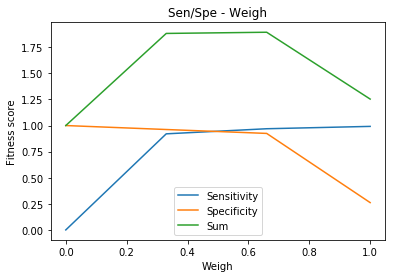

In [8]:
%load_ext autoreload
%autoreload



dataframe_results = libraries.interpretability_methods.getMeanSenSpeByWeight(vec_values_sen_spe_models)
display(dataframe_results)

#dataframe_results['product'] = dataframe_results.Sensitivity * dataframe_results.Specificity


libraries.interpretability_plots.plotSenSpeWeigh(dataframe_results, 'Sen/Spe - Weigh')


<b style="background-color:red;color:white">Question 2</b>: Explain what is the meaning/role of the alpha value? Why we "play" with it? How is it related with the weights given to sebnsitivity and specificity? What would imply a high weight for sensitivity, respectively specificity?
<br>

<b style="background-color:red;color:white">Question 3 </b>: Decide on an alpha value to be used to define the (fitness) weights for sensitivity and specificity. Explain your choice.

### Second: finding the right contribution of the RMSE

Now that you have selected a balance between sensitivity and specificity, you can search for an adequate RMSE weight in the same way.
<br>
**Important:** Don't forget to change the values of the weights for sensitivity and specificity according to your previous choice.

In [10]:
%load_ext autoreload
%autoreload
global weigh_RMSE

##############fitness function
def fit (y_true, y_pred):
    global weigh_RMSE
    
    y_pred_bin = round_to_cls(y_pred, n_classes=2)
    tn, fp, fn, tp = libraries.trefle_project.getConfusionMatrixValues(y_true, y_pred_bin)
    
    
    sensitivity = libraries.measures_calculation.calculateSensitivity(tn, fp, fn, tp)
    specificity = libraries.measures_calculation.calculateSpecificity(tn, fp, fn, tp)
    rmse = mean_squared_error(y_true, y_pred)
#Change here the values of the weigh choosed    
    weight_sen = 0.7 * (1.0 - weigh_RMSE)
    weight_spe = 0.3 * (1.0 - weigh_RMSE)
    
    #score = weight_sen * sensitivity + weight_spe * specificity + weigh_RMSE * rmse
    score = weight_sen * sensitivity + weight_spe * specificity + weigh_RMSE * math.pow(2, -rmse)
    return score

clf.fitness_function=fit


k_fold_number = 10
cv_kf = KFold(n_splits=k_fold_number, random_state=42, shuffle=True)
array_index_train_test = cv_kf.split(X_train)
array_index_train_test, array_index_train_test_copy = tee(array_index_train_test)
#--------------------
#Path where you want to save yours models (you need to create the directory befor start the algorithm)
path_save_results_directory = 'experiences/rmse_v2/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_rmse_weight_v2.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_rmse_v2_rmse'
#--------------------

model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)


#Here you can define wich values/ranges you explore for the RMSE weights 
#('here you need to change and explain your choice, on the report')
#--------------------
vec_weight = [0.2, 0.8]
number_rule = 5
var_per_rule = 5
#--------------------
i = 0
for weight_actual in vec_weight:
    
    start_time = time.time()
    model_train_obj.number_rule = number_rule
    model_train_obj.var_per_rule = var_per_rule
    model_train_obj.weight_actual = weight_actual
    
    weigh_RMSE = weight_actual
    model_train_obj.execute_cv()
    
    elapsed_time = time.time() - start_time
    i = i + 1
    print("{}, it took {} seconds".format(i, elapsed_time))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
save end
save end
save end
save end
save end
save end
save end
save end
save end
save end
1, it took 3247.924058675766 seconds
save end
save end
save end
save end
save end
save end
save end
save end
save end
save end
2, it took 3137.5113830566406 seconds


In [11]:
#Plot sen spe resuts
#read all csv
#--------------------
dataframe_results = pd.read_csv('values_rmse_weight_v2.csv')
#--------------------

#dataframe_results_c = pd.read_csv('values_w.csv')
dataframe_results.columns = ['N rule', 'N var per rule','Weight', 'CV number', 'tn', 'fp', 'fn', 'tp', 'file_name']
#display(dataframe_results)

In [12]:
%load_ext autoreload
%autoreload
#Plot all values
#don't forget to turn off the others plotss
vec_values_sen_spe_models_w_rmse = libraries.interpretability_methods.getSenSpeValuesByScoresWeigh(dataframe_results)
#print(vec_values_sen_spe_models_w_rmse)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Sensitivity,Specificity
Weight,,
0.2,0.964709,0.895072
0.8,0.976105,0.917410


[0.8950721500721499, 0.9174098124098125]


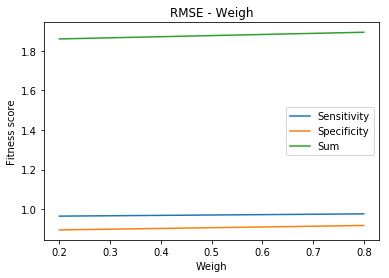

In [13]:
%load_ext autoreload
%autoreload



dataframe_results = libraries.interpretability_methods.getMeanSenSpeByWeight(vec_values_sen_spe_models_w_rmse)
display(dataframe_results)

#dataframe_results['product'] = dataframe_results.Sensitivity * dataframe_results.Specificity


libraries.interpretability_plots.plotSenSpeWeigh(dataframe_results, 'RMSE - Weigh')


<b style="background-color:red;color:white">Question 4 </b>: Analyze the graphic above and decide on a weight for the RMSE contribution to the fitness funnction. Justify your choice. What are your final values for the three weights? How do you interpret them?

## 1.2 Model-parameter search

Now that the fitness function have been defined, we may search values for other parameters of the algorithm. In this part we will focus on the size (complexity) of the model, represented by the number of rules and the number of variables per rule.

<b style="background-color:red;color:white">Question 5</b>: Explain what are the implications of these two parameters (i.e., number of rules and number of variables per rule) on the models, in terms of both performance and interpretability.
<br>
<b style="background-color:red;color:white">Question 6</b>: If you have setted your algorithm up to use 6 rules and 5 variables per rule on a dataset composeed of 100 features, how many features could be used at most by a model?
<br>

** Important:** Before continuing, don't forget to set the right weights for sensitivity, specificity, and RMSE!

### Coarse estimation of the model size
Not knowing the complexity of the required models, we must first roughly estimate them. This is done by exploring a relatively large range of model sizes. Performing a grid search (i.e., exploring both parameters simultaneously) would be the best approach, but that may be extremely costly and time consuming. Instead, we will explore one of the parameters, the number of rules. 

** Note:** Before performing the experiments, don't forget to set the values for the <b>rules_number_vec</b>. They represent the number of rules, pay attention to the size of the model. Don't change the value of 'var_per_rule_fix'.

<b style="background-color:red;color:white">Question 7</b>: In your opinion, why did we decide to first explore the number of rules instead of the number of variables per rule?
<br>
<b style="background-color:red;color:white">Question 8</b>: Which values have you decided to test at this stage? Why this range?
<br>


In [14]:
%load_ext autoreload
%autoreload

##############fitness function
def fit (y_true, y_pred):
    
    y_pred_bin = round_to_cls(y_pred, n_classes=2)
    tn, fp, fn, tp = libraries.trefle_project.getConfusionMatrixValues(y_true, y_pred_bin)
    
    
    sensitivity = libraries.measures_calculation.calculateSensitivity(tn, fp, fn, tp)
    specificity = libraries.measures_calculation.calculateSpecificity(tn, fp, fn, tp)
    rmse = mean_squared_error(y_true, y_pred)
    
#--------------------
    weigh_RMSE = 0.1
    weight_sen = 0.7 * (1.0 - weigh_RMSE)
    weight_spe = 0.3 * (1.0 - weigh_RMSE)
#--------------------
    score = weight_sen * sensitivity + weight_spe * specificity + weigh_RMSE * math.pow(2, -rmse)
    return score

clf.fitness_function=fit
###############

#Path where you want to save yours models (you need to create the directory befor start the algorithm)
path_save_results_directory = 'experiences/n_rules/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_number_of_rules.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_number_of_rules'

model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)


#Here we can choose wich values for the number of rules and maximum variable per 
#rule we want to test along our experience ('here you need to change and explain your choice, on the repport')
#--------------------
rules_number_vec = [3, 5, 7]
var_per_rule_fix = 5
#--------------------
i = 0
for qty_of_rule in rules_number_vec:
    
    start_time = time.time()
    
    model_train_obj.number_rule = qty_of_rule
    model_train_obj.var_per_rule = var_per_rule_fix
    model_train_obj.execute_cv()
    
    
    elapsed_time = time.time() - start_time
    i = i + 1
    print("{}, it took {} seconds".format(i, elapsed_time))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
save end
save end
save end
save end
save end
save end
save end
save end
save end
save end
1, it took 2850.3397550582886 seconds
save end
save end
save end
save end
save end
save end
save end
save end
save end
save end
2, it took 3160.6140649318695 seconds
save end
save end
save end
save end
save end
save end
save end
save end
save end
save end
3, it took 3513.475277900696 seconds


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,N rule,N var per rule,acc,f1,sen,spe
0,3.0,5.0,0.944872,0.955122,0.969207,0.899156
1,5.0,5.0,0.958097,0.966580,0.980232,0.923802
2,7.0,5.0,0.947503,0.956819,0.959297,0.916580


[0.899155844155844, 0.9238023088023087, 0.9165800865800866]


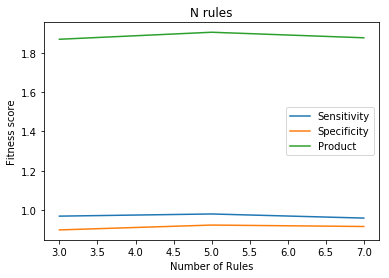

In [15]:
%load_ext autoreload
%autoreload

#Plot sen spe resuts
#read all csv
#--------------------
dataframe_results = pd.read_csv('values_number_of_rules.csv')
#--------------------

#dataframe_results_c = pd.read_csv('values_w.csv')
dataframe_results.head()

param_a_designation = 'nb of rules'
param_b_designation = 'nb of var per rule'

vec_measures = ['acc', 'f1', 'sen', 'spe']



test_data = dataframe_results.iloc[:,0:2]


data_frame_treated = libraries.trefle_project.treatmentResultsValues(dataframe_results, param_a_designation, param_b_designation, vec_measures)
data_frame_treated.columns = ['N rule', 'N var per rule', 'acc', 'f1', 'sen', 'spe']
display(data_frame_treated)



libraries.interpretability_plots.plotSenSpeNRules(data_frame_treated, 'N rules')


### Finer search of parameters

The next step will be to perform a grid search for both parameters on a narrow range of values. For this, we need to define ranges for them.


<b style="background-color:red;color:white">Question 9</b>: On the base of the graphic above, select a narrower range for the number of rules to be explored in the next step. Justify your choice.
<br>
<b style="background-color:red;color:white">Question 10</b>: Then, define a range of values for the number of variables per rule. How did you decide on them? Why?

In [ ]:
#Var per rule and number of rules


#--------------------
#Path where you want to save yours models (you need to create the directory befor start the algorithm)
path_save_results_directory = 'experiences/n_rules_nvar/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_number_of_rules_nvar.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_number_of_rules_var'
#--------------------


model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)



#Here we can choose wich values for the number of rules and maximum variable per 
#rule we want to test along our experience ('here you need to change and explain your choice, on the repport')
#--------------------
rules_number_vec = [4, 5]
var_per_rule_vec = [2,3,5]
#--------------------
i = 0
for variation_a in rules_number_vec:
    for variation_b in var_per_rule_vec:
        
        start_time = time.time()
        model_train_obj.number_rule = variation_a
        model_train_obj.var_per_rule = variation_b
        model_train_obj.execute_cv()
        
        
        elapsed_time = time.time() - start_time
        i = i + 1
        print("{}, it took {} seconds".format(i, elapsed_time))

save end
save end
save end
save end


In [ ]:
#load models
%load_ext autoreload
%autoreload


#play with the results of the differents executions
data = pd.read_csv("values_number_of_rules_nvar.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

param_a_designation = 'nb of rules'
param_b_designation = 'nb of var per rule'

vec_measures = ['acc', 'f1', 'sen', 'spe']



test_data = data.iloc[:,0:2]


data_frame_treated = libraries.trefle_project.treatmentResultsValues(data, param_a_designation, param_b_designation, vec_measures)
data_frame_treated.columns = ['N rule', 'N var per rule', 'acc', 'f1', 'sen', 'spe']
display(data_frame_treated)

#### Visualize with 3D graphs
Below you may visualize the performance of your models according to the explored paramaters: number of rules and number of variables per rule. You may change the code so as to make plots for different metrics (Acc, F1, Sen and Spe). You could also add new/different metrics by creating the corresponding method in the 'measures_calculation' class.

In [ ]:
#plot 3D
%matplotlib notebook



X = data_frame_treated['N rule']
Y = data_frame_treated['N var per rule']
Z = data_frame_treated['acc']

y_axis_values = range(math.floor(min(Y)), math.ceil(max(Y))+1)
x_axis_values = range(math.floor(min(X)), math.ceil(max(X))+1)


fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z,  cmap=cm.YlGnBu, linewidth=0, antialiased=False)

#ax.set_zlim(-1.01, 1.01)
ax.set_xticks(x_axis_values, minor=False)
ax.set_yticks(y_axis_values, minor=False)

ax.set_xlabel('$Number of rules$')
ax.set_ylabel('$Number of var per rule$')


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))



fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Sensitivity')
plt.show()

<b style="background-color:red;color:white">Question 11</b> In your opinion, which values/ranges of both parameters: number of rules and vars per rule, should you choose to obtain the best models? (comment briefly on the plot and include it into to report)

Don't forget to change those values below!

### Additional refinement of the parameter search

Now that we observed the plot we can refine the search for parameter values. As for the previous experiment it is necessary to:
<ul>
    <li>define new values/ranges for the number of rules </li>
    <li>define new values/ranges number of variable per rule </li>
    <li>change the path name where you want to save the new models </li>
    <li>change the name of the file that will contain the number of experiments</li>
     
</ul>

In [ ]:
#Var per rule and number of rules


#Change the path directory where you want to save the new results
#--------------------
#Path where you want to save yours models (you need to create the directory befor start the algorithm)
path_save_results_directory = 'experiences/n_rules_nvar_tuning/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_number_of_rules_nvar_tuning.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_number_of_rules_var_tuning'
#--------------------


model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)


#Here we can choose wich values for the number of rules and maximum variable per 
#rule we want to test along our experience 
#('here you need to change and explain your choice, on the repport')
#--------------------
rules_number_vec = [6,7]
var_per_rule_vec = [3,4]
#--------------------

for variation_a in rules_number_vec:
    for variation_b in var_per_rule_vec:
        model_train_obj.number_rule = variation_a
        model_train_obj.var_per_rule = variation_b
        model_train_obj.execute_cv()

### Consolidating the results
Now, put all yours models in the same directory (copy/past) and add all the csv results to the dataframe in order to analyse the results

In [ ]:
#Filter sen/spe
#read all csv
dataframe_results = pd.read_csv('values_number_of_rules.csv')
dataframe_results_b = pd.read_csv('values_number_of_rules_nvar.csv')
dataframe_results_c = pd.read_csv('values_number_of_rules_nvar_tuning.csv')
dataframe_results_d = pd.read_csv('values_rmse_weight.csv')
dataframe_results_e = pd.read_csv('values_sen_spe_weight.csv')

dataframe_results_all = dataframe_results_b.append(dataframe_results)
dataframe_results_all = dataframe_results_all.append(dataframe_results_c)
dataframe_results_all = dataframe_results_all.append(dataframe_results_d)
dataframe_results_all = dataframe_results_all.append(dataframe_results_e)

#dataframe_results_c = pd.read_csv('values_w.csv')
dataframe_results_all.columns = ['N rule', 'N var per rule','weight','CV number', 'tn', 'fp', 'fn', 'tp', 'file_name']
dataframe_results_all = dataframe_results_all.reset_index(drop=True)
#display(dataframe_results_all)

# 2 Model selection

Once we have tested all the configurations, we have obtained a **large** number of models exhibiting diverse performance figures. At the end of a modeling process, the goal is to obtain one, or a few, models that would be deployed and used for new predictions. A selection process is thus necessary.

A first selection is performed by applying a filter based on the diagnostic performance, thus reducing the number of models. Below you can see a scatter plot of all the models you obtained according to their sensitivity and specificity (as obtained on the validation subsets).

In [ ]:
#Plot sent spe all

#Plot all values
#don't forget to turn off the others plotss
vec_values_sen_spe_models = libraries.interpretability_methods.getSenSpeValuesByScores(dataframe_results_all)
#vec_values_sen_spe_models = libraries.interpretability_methods.getSenSpeValuesByScores(data_frame_treated)

plt.scatter(vec_values_sen_spe_models['Sensitivity'],vec_values_sen_spe_models['Specificity'],s=10, marker='o')

plt.title('Threshold sen/spe')
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.savefig('ScatterPlot.png')

plt.xlim(0,1)
plt.ylim(0,1)

plt.show()
print('You have {0} models'.format(len(vec_values_sen_spe_models)))


## First selection filter: based on sen/spe

Having analysed the above performance overview of your models, you can apply a filter based on  sensitivity and specificity. In this way, only those models exhibiting better performance than some specified threshold will be selected for the next step.
The plot below shows the effect of the combined thresholds on the number of models remaining after the filter is applied.

In [ ]:
#Plot sen_spe  qty models 3D
#that save x models
%matplotlib notebook

results_qty_models = libraries.interpretability_methods.plotSenSpeQtyModelsByThreshold(vec_values_sen_spe_models)

#display(results_qty_models)

X = results_qty_models['sensitivity']
Y = results_qty_models['specificity']
Z = results_qty_models['qty_models']

#y_axis_values = range(math.floor(min(Y)), math.ceil(max(Y))+1)
#x_axis_values = range(math.floor(min(X)), math.ceil(max(X))+1)

max_quantity = results_qty_models.loc[results_qty_models['qty_models'].idxmax()]
max_quantity = int(max_quantity['qty_models'])

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z.values,  cmap=cm.YlGnBu, linewidth=0, antialiased=False)

#ax.set_zlim(0, max_quantity)
ax.set_zticks(Z)
#ax.set_xticks(x_axis_values, minor=False)
#ax.set_yticks(y_axis_values, minor=False)

ax.set_xlabel('$Sensitivity$')
ax.set_ylabel('$Specificity$')



ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))



fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Sen/Spe threshold')
plt.show()

On the base of this plot, you should decide on threshold values for both, specificity and sensitivity and apply them. The resulting subset of selected models is shown in the scatterplot below.

In [ ]:
#select values sen spe filtre
%load_ext autoreload
%autoreload

#Put a limit in sen/spe
#Here you put the threshold for the sensitivity and specificity
#Don't forget to shave the plot and comment into your repport
#--------------------
value_sensitivity = 0.6
value_specificity = 0.6
#--------------------


#We apply them

vec_values_sen_spe_models_filtered = libraries.interpretability_methods.filterDataframeBySenSpeLimit(value_sensitivity, value_specificity, vec_values_sen_spe_models)
vec_values_sen_spe_models_filtered_invert = libraries.interpretability_methods.filterDataframeBySenSpeLimitContrary(value_sensitivity, value_specificity, vec_values_sen_spe_models)


figure = libraries.interpretability_plots.plotDataFrameValuesFiltered(value_sensitivity, value_specificity,vec_values_sen_spe_models_filtered, vec_values_sen_spe_models_filtered_invert)


print('You have {0} models'.format(len(vec_values_sen_spe_models_filtered)))

<b style="background-color:red;color:white">Question 12</b>: Explain your choice of the threshold values for the sensitivity and specificity. (Save both plots into your reports)

<b>Save the plot on the repport</b>

## Second selection: frequency-based filter

Next, a second model-selection filter is applied based on the "importance" of the features. Such feature importance is represented in this context by their relative presence (i.e. their frequency) among the models. 

#### Frequency of the variables
The figure below shows the frequency of the variables among all the remaining models.

In [ ]:
%load_ext autoreload
%autoreload
  
    
#--------------------
list_models_path_complete = []
for index, row in vec_values_sen_spe_models_filtered.iterrows():
    model_path_complete = "experiences/all_models/" + str(row['file_name'])
    list_models_path_complete.append(model_path_complete)
#--------------------
    
#Perform the counting
list_models_vars = libraries.interpretability_methods.transformModelsToModelVarObj(list_models_path_complete)


In [ ]:
#plot histogram before cut

dict_values_resultant = libraries.interpretability_methods.countVarFreq(list_models_vars)




#indication of the number of models and variables
qty_models = len(list_models_vars)
qty_variables = len(dict_values_resultant)
print("You have {0} models and {1} variables".format(qty_models, qty_variables))

#Plot the new histogram
libraries.interpretability_plots.plotHistogramFreqVar(dict_values_resultant)


#### Choosing a frequency threshold
Filtering features by frequency will result in a reduction of both the number of features and the number of models, as models with eliminated variables are also eliminated. 

The plot below represents the number of models and variables that should remain after the filter is applied in function of the frequency threshold. It helps you to decide on which threshold to use for the filter.

(Note that the frequency of a feature is calculated as the number of <b>different models</b> where it appears irrespective of the number of rules containing it.)

In [ ]:
%load_ext autoreload
%autoreload
#Perform the counting
list_models_vars = libraries.interpretability_methods.transformModelsToModelVarObj(list_models_path_complete)
dict_values = libraries.interpretability_methods.countVarFreq(list_models_vars)


#TEST zone
matrix_results = libraries.interpretability_methods.createPlotQtyVarPerModelByMinimumFreq(dict_values,list_models_vars)
#display(matrix_results)
#End test zone



ax = plt.figure().gca()

matrix_results.plot(kind='line',x='min freq var',y='number of models',ax=ax)
matrix_results.plot(kind='line',x='min freq var',y='quantity of variables', color='red', ax=ax)

plt.show()

#libraries.interpretability_plots.plotFreqVarPerFreqMinimum(matrix_results)

based on the plot above, select the minimum frequency (threshold) for the variables on your models.

<b style="background-color:red;color:white">Question 13</b>: Explain your choice of the threshold. (Save both plots into your report)

You need to indicate the name of the file where you want to save the models

In [ ]:
#valide the frequence value

#Create a copy of the list that contains the model_var objects
list_models_vars_cpopy = list_models_vars.copy()
#select the minimum frequenty
#--------------------
nb_min_var = 58
#--------------------

#Perform the frequence
list_model_var_resultant = libraries.interpretability_methods.reduceQtyVars(nb_min_var, dict_values,list_models_vars_cpopy)
dict_values_resultant = libraries.interpretability_methods.countVarFreq(list_model_var_resultant)




#indication of the number of models and variables
qty_models = len(list_model_var_resultant)
qty_variables = len(dict_values_resultant)
print("You have {0} models and {1} variables".format(qty_models, qty_variables))

#Plot the new histogram
libraries.interpretability_plots.plotHistogramFreqVar(dict_values_resultant)
#Show the frequency table
dict_Values_ordered = libraries.interpretability_methods.sort_reverse_dictionary_by_values(dict_values_resultant)
datafram_var_freq = pd.DataFrame(list(dict_Values_ordered.items()),columns=['Variable name','Frequence'])
display(datafram_var_freq)


#Perform the list of the models
#--------------------
file_name = 'models_selected.csv'
#--------------------
list_models_names=[model_var.model_path for model_var in list_model_var_resultant]
dataframe_names_files = pd.DataFrame(list_models_names)
dataframe_names_files.to_csv(file_name, sep=',', encoding='utf-8')

Carlos: Don't forget to save the plot resultant of your choice...
<br>
<b>The objective of the lab is to arrived at the end with 5-10 models

# 3. Analysis of the selected models

Now that you have selected the best models, they are saved on the file "models_selected.CSV" (Or other file if you change the name...)
You may then load these models and use them to compute their predictions for the observations in the test set.

In [ ]:
%load_ext autoreload
%autoreload

# Import from file
#--------------------
fis = TrefleFIS.from_tff_file("experiences/all_models/exps_lab_lfa_rmse_weigh_actual_1.0_conf_A_CV_0_rule_2_var_per_rule_2.ftt")
#--------------------
# In the future, it could possible to call clf.predict_classes() directly
# see issue #1
y_pred_test = fis.predict(X_test)

results_list_predictions = np.squeeze(np.asarray(y_pred_test))


#libraries.results_plot.plotCMByTreflePredictions(y_test, results_list_predictions)
#Convert your results into binary values
results = []
for element in y_pred_test:
    if element > 0.5:
        results.append(1)
    else:
        results.append(0)

from libraries.ConfusionMatrix import ConfusionMatrix
cm = confusion_matrix(y_test, results)
n_classes = len(np.unique(y))
ConfusionMatrix.plot(cm, classes=range(n_classes), title="Confusion Matrix")

The code above is only an example of how to load models and test their performance in the test set. (Remember that the test set is the one who has not been used during the previous training/selectionn steps.)

<b><span style="background-color:red;color:white">Question 14</span></b>: Among the final models, select three of them as follows: the smallest one (in terms of rules and variables), the best one (in terms of performance), and one in the "middle" that you consider as being a good trade-off between size and performance. With them:
<ul>
    <li>Apply them to the test set and analyze the results you obtained</li>
    <li>Analyze them in terms of size, rules, vars per rules and other characteristics that you think are relevant</li>
    <li>As far as possible, analyze their rules and try to "explain" their predictions.
</ul>
<br>
Tips: You can use plots to described your results...